# **Transformation**

## Objectives

* Having extracted and examined the data in Extraction.ipynb and with y-data profile we will use this notebook to transform the data.
    Columns of Interest for potential transformation:
    *  Marital status and sex - both have unknown values which need to be handled
    *  Attrition flag should be transformed from text to either boolean or numeric (potentially add new columns or separate datasets for attrited/ existing cutomers)
    *  Some columns have outliers such as Credit_Limit and Avg_Open_To_Buy decide how to deal with these and if any transformation is necessary.
    *  Other columns will need to be dropped as they are not relevant to project (Both Naive_Bayes columns for example)

## Inputs

* We will be using the raw BankChurners.ipynb as the main input
* The project hypotheses as documented in README 

## Outputs

* A cleaned and transformed csv file
* Visualisations to support the transformation process
* Dialogue to show rationale for any transformation

## Additional Comments

* While most transformation will be completed in this notebook - some may also take place in powerBI with the cleaned CSV file (adding or renaming columns for example). These changes will be documented in this notebbok.
 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Hackathon1\\Team1_Hackathon\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Hackathon1\\Team1_Hackathon'

# Setup

Import all the Python libraries required to carry out ETL (Extract, Transform, Load) and EDA (Exploratory Data Analysis).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline # For building machine learning pipelines
from feature_engine.encoding import OneHotEncoder # For encoding categorical variables
from feature_engine.outliers import Winsorizer # For handling outliers

sns.set_theme(style="whitegrid") # Set seaborn theme for plots
pd.set_option('display.max_columns', None) # Display all columns in pandas DataFrames


---

# Transform


1. Import the raw dataset (`BankChurners.csv`) into a DataFrame.
2. Create a copy of the raw data to preserve the original.
3. Check the dataset’s dimensions (rows and columns).
4. Preview the first few rows to understand the structure and content.


In [5]:
# Load the raw data
df_raw = pd.read_csv('Data/Raw/BankChurners.csv')

# Make a copy of the raw data
df = df_raw.copy()

# Display the first few rows of the dataframe
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


---

# Initial Transformation

---

* Dropping the below columns as we are not considering them for further analysis 

    CLIENTNUM
    Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    
    Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

In [6]:
# drop irrelevant columns

df_cleaned = df.iloc[:, 1:-2]
df_cleaned.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


* Performing Chi-square independence test on categorical columns vs attrition_flag 

In [7]:
# chi-square independence test on categorical columns vs attrition_flag

import pingouin as pg   

# expected, observed, stats = pg.chi2_independence(data=df_cleaned, x='Marital_Status', y='Attrition_Flag')
# print(stats)
# print(stats.query("test == 'pearson'")['pval'])

results = []
cat_cols = df_cleaned.select_dtypes(include='object').columns.drop('Attrition_Flag')

for col in cat_cols:

    expected, observed, stats = pg.chi2_independence(data=df_cleaned, x=col, y='Attrition_Flag')
       
    p_value = stats.query("test == 'pearson'")['pval'].values[0] 
    
    results.append({'Variable': col, 'Pearson_pval': p_value})

results_df = pd.DataFrame(results)
results_df  


c:\Users\mikee\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


,Variable,Pearson_pval
0,Gender,0.000196
1,Education_Level,0.051489
2,Marital_Status,0.108913
3,Income_Category,0.025002
4,Card_Category,0.525238


#### Based on the observations of p-val from the chi-squared independence test, we conclude the following:

** Features with significant correlation with Attrition_Flag :
1. Gender 
2. Income_Category 

** Even though p-val is slightly > 0.05 for the below 2 features, we will still consider them - since there was warning from chi2 test telling that some cells in your contingency table have low expected counts. Proceeding with caution since our data sample is not very large.

3. Education_Level
4. Card_Category  

** Features with insignificant correlation with Attrition_Flag

5. Marital_Status 


#### Analysing and handling the unknown values in Education_Level and Income_Category columns

In [8]:
# grouping by Education_Level and Income_Category to see the distribution of Attrition_Flag within each category:

edu_group = df_cleaned.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True).unstack()
print(edu_group)

unknown_edu_pct = (df_cleaned['Education_Level'] == 'Unknown').mean() * 100
unknown_edu_pct


Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                   0.152024           0.847976
Doctorate                 0.210643           0.789357
Graduate                  0.155691           0.844309
High School               0.152012           0.847988
Post-Graduate             0.178295           0.821705
Uneducated                0.159381           0.840619
Unknown                   0.168532           0.831468


14.999506270366346

In [9]:
# grouping by Income_Category to see the distribution of Attrition_Flag within each category:

income_group = df_cleaned.groupby('Income_Category')['Attrition_Flag'].value_counts(normalize=True).unstack()
print(income_group)

unknown_income_pct = (df_cleaned['Income_Category'] == 'Unknown').mean() * 100
unknown_income_pct

Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                   0.173315           0.826685
$40K - $60K               0.151397           0.848603
$60K - $80K               0.134807           0.865193
$80K - $120K              0.157655           0.842345
Less than $40K            0.171862           0.828138
Unknown                   0.168165           0.831835


10.980547052434087

#### From the stats above,we infer:
- 16.8% of customers with unknown education_level have churned.
- unknown education category accounts for ~15% of the total churned customers.

- 16.8% of customers with unknown income levels have churned.
- unknown income category accounts for ~11% of the total churned customers.

* since the stats show a significant proportion we will keep them as is and not drop or impute them

In [10]:
# Binnig age into categories for visualization

age_bins = [18, 35, 55, 100]
age_labels = ['Young', 'Middle-aged', 'Older']

df_cleaned['Age_Group'] = pd.cut(df_cleaned['Customer_Age'], bins=age_bins, labels=age_labels, include_lowest=True)
df_cleaned.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Middle-aged
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Middle-aged
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Middle-aged
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Middle-aged
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Middle-aged


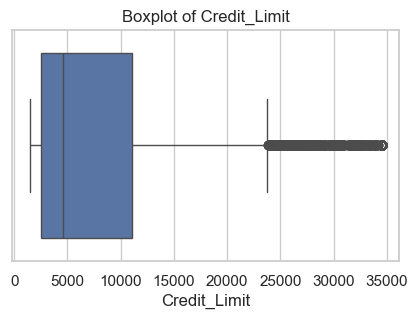

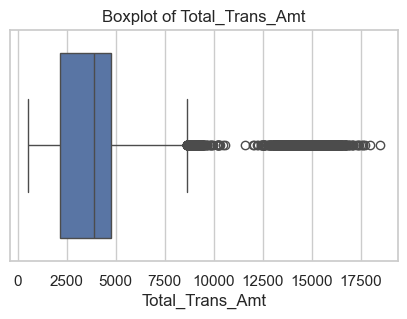

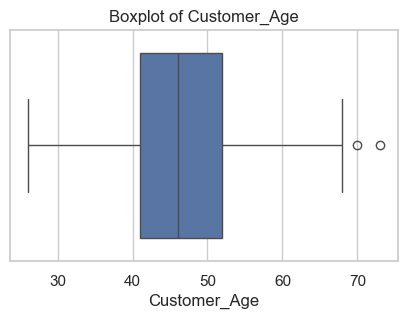

In [11]:
# checking for outliers in the numerical columns before transformation

for col in ['Credit_Limit','Total_Trans_Amt','Customer_Age']:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:
# one hot encoding the attrition flag to use in power-bi 
# handling ouliers using Winsorization on Credit limits and total transaction amount (age ignored since it did not have outliers)

df_cleaned['Attrition_Flag_Original'] = df_cleaned['Attrition_Flag']

ohe_attr = OneHotEncoder(variables=['Attrition_Flag'], drop_last=True)

pipeline = Pipeline([
      ( 'ohe_attr', OneHotEncoder(variables=['Attrition_Flag'],drop_last=True)),
      ( 'winsorizer_iqr', Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables=['Credit_Limit', 'Total_Trans_Amt']) )
])

df_transformed = pipeline.fit_transform(df_cleaned)
df_transformed.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Attrition_Flag_Original,Attrition_Flag_Existing Customer
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144.0,42,1.625,0.061,Middle-aged,Existing Customer,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291.0,33,3.714,0.105,Middle-aged,Existing Customer,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887.0,20,2.333,0.000,Middle-aged,Existing Customer,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171.0,20,2.333,0.760,Middle-aged,Existing Customer,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816.0,28,2.500,0.000,Middle-aged,Existing Customer,1


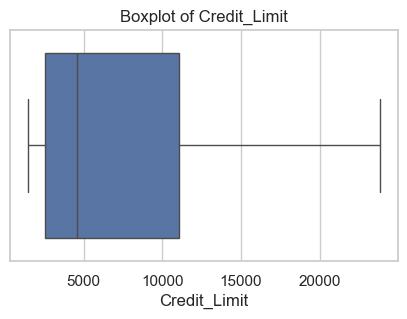

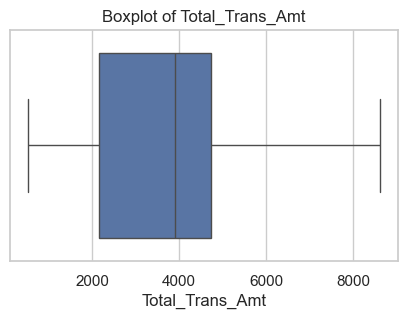

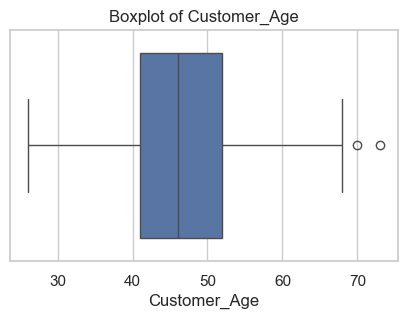

In [13]:
# checking for outliers in the numerical columns after transformation

for col in ['Credit_Limit','Total_Trans_Amt','Customer_Age']:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_transformed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Loading the cleaned and transformed dataset to a new csv file 'BankChurners_transformed.csv'


In [14]:
current_dir = os.getcwd()
current_dir

df_transformed.to_csv('Data/Processed/BankChurners_transformed.csv', index=False)

# Push files to Repo

---

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [15]:
# import os
# try:
#   # create your folder here
#   # os.makedirs(name='')
# except Exception as e:
#   print(e)
